In [60]:
import fire
import os
import requests
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import numpy as np
import alpaca_trade_api as alpaca
import questionary
import hvplot.pandas

from qualifier.utils.alpaca_api import alpaca_func
from qualifier.utils.analysis import largest_25_OI
from qualifier.utils.analysis import options_call_bar
from qualifier.utils.analysis import options_put_bar
from Modules.CleanData import get_data
# from qualifier.utils.SQL import add_new_table

# alpaca_func(key=alpaca_key, secret=alpaca_secret, START_DATE=START_DATE, END_DATE=END_DATE)
# add_new_table(data=a)



In [61]:
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret = os.getenv("ALPACA_SECRET_KEY")

start_date = "2022-01-01"
end_date = "2022-05-30"

date = "09-14-2022"

In [62]:
# Calling alpaca_func
# alpaca_func(alpaca_key, alpaca_secret, start_date, end_date)

Successfully gathered data from API.


In [63]:
# Calling get_data()
# From the query, SELECT *
df = get_data(date)


In [64]:
# Calling largest_25_OI
largest_25_OI(df)

:Bars   [Symbol,Type]   (Open Int)

In [65]:
# Calling options_call_bar
options_call_bar(df)

:Bars   [Symbol,Strike]   (Open Int)

In [66]:
# Calling options_put_bar
options_put_bar(df)

:Bars   [Symbol,Strike]   (Open Int)

In [67]:
calls = df[df['Type'] == 'Call'].drop(columns='Price')
calls.head()

,Symbol,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,OI Chg,IV,Time
155,AAL,Call,14.0,2022-09-16,2.0,0.26,0.27,0.27,0.26,10637.0,22188.0,"+2,212",58.91%,2022-09-14
1237,AAPL,Call,140.0,2022-09-16,2.0,15.25,15.40,15.55,15.54,674.0,21206.0,-399,75.41%,2022-09-14
1119,AAPL,Call,150.0,2022-09-16,2.0,5.45,5.65,5.85,5.80,3846.0,48536.0,-941,44.45%,2022-09-14
689,AAPL,Call,152.5,2022-09-16,2.0,3.50,3.58,3.65,3.60,9040.0,17736.0,+645,38.43%,2022-09-14
1142,AAPL,Call,155.0,2022-09-16,2.0,1.88,1.89,1.90,1.90,80360.0,48254.0,-773,36.40%,2022-09-14


In [68]:
puts = df[df['Type'] == 'Put'].drop(columns='Price')
puts.head()

,Symbol,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,OI Chg,IV,Time
1907,AA,Put,43.0,2022-09-16,2.0,0.40,0.43,0.45,0.41,600.0,188.0,-19,83.62%,2022-09-14
1839,AA,Put,45.0,2022-09-16,2.0,1.16,1.20,1.24,1.19,1360.0,2098.0,-27,82.53%,2022-09-14
159,AAL,Put,14.0,2022-09-16,2.0,0.23,0.24,0.25,0.24,1931.0,16516.0,"+2,156",61.74%,2022-09-14
112,AAPL,Put,147.0,2022-09-16,2.0,0.10,0.11,0.11,0.11,25360.0,18623.0,"+2,786",46.11%,2022-09-14
117,AAPL,Put,148.0,2022-09-16,2.0,0.14,0.15,0.15,0.14,10389.0,5922.0,"+2,731",43.82%,2022-09-14


In [74]:
df = get_data(date)


calls = df[df['Type'] == 'Call'].drop(columns='Price')
puts = df[df['Type'] == 'Put'].drop(columns='Price')


In [70]:
# Creates connection.
api_alpaca = alpaca.REST(key_id=alpaca_key, secret_key=alpaca_secret, api_version="v2")

# Specifies tickers to get from Alpaca API.
# df = api_alpaca.get_bars(symbol=["FB","MSFT", "AAPL"], timeframe="1D", start="2022-01-01", end="2022-05-30").df
df = api_alpaca.get_bars(symbol=["META","MSFT", "AAPL"], timeframe="1D", start=start_date, end=end_date).df



In [71]:
# Specifies which companies to get data for.
meta_df = df[df["symbol"]=="META"].drop(columns="symbol",axis = 1)

msft_df = df[df["symbol"]=="MSFT"].drop(columns="symbol",axis = 1)

aapl_df = df[df["symbol"]=="AAPL"].drop(columns="symbol",axis = 1)



In [72]:
# Concat data together.
meta_msft_aapl_df = pd.concat([meta_df, msft_df, aapl_df], axis = 1, keys = ["META","MSFT", "AAPL"])



Successfully gathered data from API.


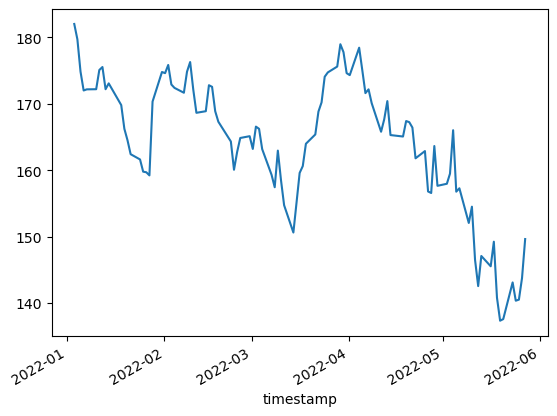

In [73]:
# Plots the data frame.
plot = meta_msft_aapl_df["AAPL"]["close"].plot()

# Prints a message.
print(f"Successfully gathered data from API.")